In [ ]:
from tensorflow import keras

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install keras

In [ ]:
from keras import layers,models

In [ ]:
import tensorflow as tf

train_path = '/content/drive/MyDrive/Dataset/Project Dataset/2_Brain_tumor/Training'
test_path = '/content/drive/MyDrive/Dataset/Project Dataset/2_Brain_tumor/Testing'

# This function helps you load images directly from a folder structure into a ready-to-use tf.data.Dataset for training.
train_df = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    batch_size=32,
)

test_df = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode="int",
    image_size=(150,150),
    batch_size=32,
)

# When using labels='inferred' in image_dataset_from_directory, TensorFlow assigns labels automatically based on folder names.
# label_mode = int,binary,categorical ,label_mode tells TensorFlow how to represent the class labels.
# batch_size=32 means the dataset will give images in groups of 32 at a time instead of one by one.


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
# x_train,y_train=[],[]
# for img,label in train_df:
#   x_train.append(img.numpy()/255.0) #convert it from[0,255] to [0,1] for better model training
#   y_train.append(label.numpy())

# x_test,y_test=[],[]
# for img,label in test_df:
#   x_test.append(img.numpy()/255.0)
#   y_test.append(label.numpy())

In [ ]:
# When you load dataset with above mentioned way than TensorFlow looks at the subfolder names inside your dataset directory (like cats/, dogs/, horses/).
# It stores those names in alphabetical order in train_df.class_names.

class_names = train_df.class_names
print(f"Class names: {class_names}")

Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
train_df = train_df.map(lambda x, y: (x/255.0, y))
test_df = test_df.map(lambda x, y: (x/255.0, y))
# x/255.0 scales them into the range 0–1 (called normalization)
# After division → [120/255, 200/255, 50/255] ≈ [0.47, 0.78, 0.20]

In [ ]:
for img, l in train_df.take(1): # .take(n) → gives you the first n batches from the dataset.
    print("Image shape:", img.shape)
    print("Label:", l.numpy())

Image shape: (32, 150, 150, 3)
Label: [3 0 1 1 1 2 2 3 2 2 0 1 1 2 3 2 3 1 1 2 1 2 2 1 2 1 2 3 1 0 0 1]


In [ ]:
# import numpy as np
# x_train=np.array(x_train)
# y_train=np.array(y_train)
# x_test=np.array(x_test)
# y_test=np.array(y_test)

# print("x_train_shape,y_train_shape",x_train.shape(),y_train.shape())
# print("x_test_shape,y_train_shape",x_test.shape(),y_test.shape())

In [ ]:
# y_train_r=y_train_reshape(-1)

In [ ]:
import matplotlib.pyplot as plt

def plot_s(dataset, index):
  for i,(images,labels) in enumerate(dataset.unbatch()):
    if i==index:
        plt.figure(figsize=(2,2))
        plt.imshow(images.numpy())
        plt.xlabel(class_names[labels.numpy()])
        plt.show()
        break

In [ ]:
# enumerate() is a built-in Python function that lets you loop through a collection
#  (like a list, string, tuple, or dataset) and get index and actual value.
fruits = ["apple", "banana", "cherry"]
for i, fruit in enumerate(fruits):
    print(i, fruit)

list(enumerate(["a","b","c"]))
# First you get index than actual value

0 apple
1 banana
2 cherry


[(0, 'a'), (1, 'b'), (2, 'c')]

In [ ]:
# When the loop reaches the image you want (say index 5), it executes the plotting code.
# images is a Tensor → .numpy() converts it to a NumPy array (needed for imshow).
# class_names[...] converts it to the actual class name (e.g., "cat").

# enumerate(iterable, start=0) : iterable → list, tuple, string, dataset, generator, etc.

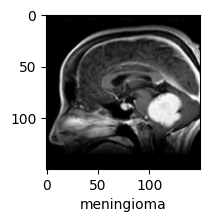

In [ ]:
plot_s(train_df,200)

In [ ]:
# def plot_s(index):
#   plt.figure(figsize=(2,2))
#   # plt.imshow(x_train[index])
#   plt.imshow(images[5].numpy())
#   plt.xlabel(class_names[labels[5].numpy()])
#   # plt.xlabel(l[y_train[index]])
#   plt.show()

In [ ]:
model=keras.Sequential(
    [
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),

        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(400,activation='relu'),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(200,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(4,activation='softmax')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# EarlyStopping is a callback — it watches the training and can stop it early if conditions are met.
# This helps prevent overfitting and saves training time.

# restore_best_weights=True
# → after stopping, it resets the model’s weights to the best epoch (lowest validation loss).

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",    # watch validation loss
    patience=3,            # stop if no improvement for 3 epochs
    restore_best_weights=True
)

history = model.fit(
    train_df,
    validation_data=test_df,
    epochs=50,             # set a high max
    callbacks=[early_stop]
)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 785s 4s/step - accuracy: 0.4522 - loss: 1.1196 - val_accuracy: 0.6773 - val_loss: 0.8390
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.7500 - loss: 0.6201 - val_accuracy: 0.7574 - val_loss: 0.5998
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.8071 - loss: 0.4944 - val_accuracy: 0.8162 - val_loss: 0.4388
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.8657 - loss: 0.3650 - val_accuracy: 0.8322 - val_loss: 0.4355
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.8847 - loss: 0.3104 - val_accuracy: 0.8658 - val_loss: 0.3147
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.9171 - loss: 0.2278 - val_accuracy: 0.8955 - val_loss: 0.2610
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9158 - loss: 0.2195 - val_accuracy: 0.9100 - val_loss: 0.2247
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.9399 - loss: 0.1

In [ ]:
# model.fit(train_df,validation_data=test_df,epochs=30)

In [ ]:
y_pred=model.predict(test_df)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step


In [ ]:
y_pred[1000]

array([9.9883062e-01, 1.0764647e-03, 3.1791347e-05, 6.1070561e-05],
      dtype=float32)

In [ ]:
y_pred[1000].argmax()

np.int64(0)

In [ ]:
# def plot_s(index):
#   plt.figure(figsize=(2,2))
#   plt.imshow(x_test[index])
#   plt.xlabel(l[y_pred(index).argmax()])
#   plt.show()

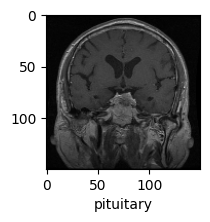

In [ ]:
plot_s(test_df,1000)

In [ ]:
# Save as .h5 file
model.save("brain_tumor.keras")

In [ ]:
from google.colab import files

# Download .h5 file
files.download("brain_tumor.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(model.input_shape)


(None, 150, 150, 3)
